<a href="https://colab.research.google.com/github/GulzhanIsaeva/AI_App_Sys_12194812_Midterm/blob/main/Week6_lab(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In the 6th Week Lab's we learned about:
1. Linear Regression using TensorFlow
2. Visualization of Linear Regression parameters using TensorFlow
3. Digit Classification | Neural network to classify MNIST dataset using TensorFlow

First, installing the 1.15.5 version of the TensorFlow is necassary in order to make all your commands run.

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import the numpy, tenserflow and matplotlib libraries

In [ ]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

### Defining the parameters:

In [ ]:
learning_parameter = 0.01
epochs = 300

### Creating the dataset of linear regression: Here the line is y= Ax

In the graph plotted below the *blue dots* are *noisy observations* corresponding to the noisy dataset, and the *green line* corresponds to the *noise-free* dataset.


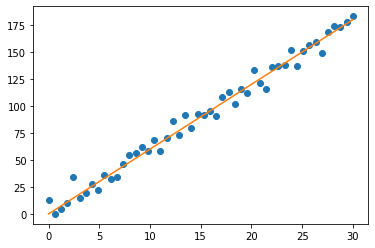

In [ ]:
sample_points = 50
x_train = np.linspace(0,30,sample_points)
y_train = 6*x_train + 7*np.random.randn(sample_points)

# Noisy dataset
plt.plot(x_train, y_train, 'o')

# Noise free dataset
plt.plot(x_train, 6*x_train)
plt.show()

### The took is to fit Y= WX + B onto the noisy dataset. Here X & Y will be the placeholders and (W,B) will be the variables

In [ ]:
Y = tf.placeholder(tf.float32)
X = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name = 'weights')
B = tf.Variable(np.random.randn(), name = 'bias')

In [ ]:
# Create a model for regression
prediction = W*X + B

#Cost function
cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

#Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize the variables
init = tf.global_variables_initializer()


### Defining the predict, define the optimizer, and initialize the variables.

To execute the graph, it is necessary to start the TensorFlow session.

### After running, you can see that for each intervals of 40 the cost is going down and we are learning the weights and biases



Epoch 0.000000 Cost 0.919707 Weight 5.775624 Bias 0.251755


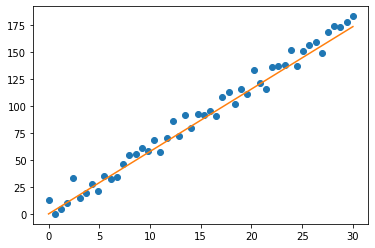

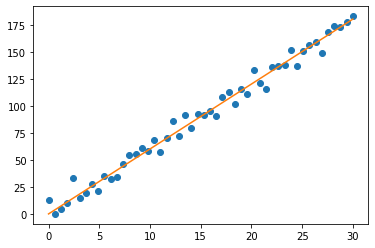

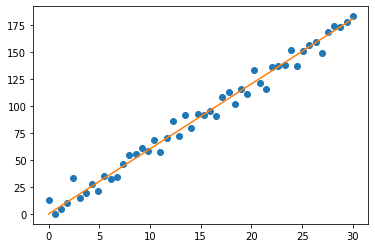

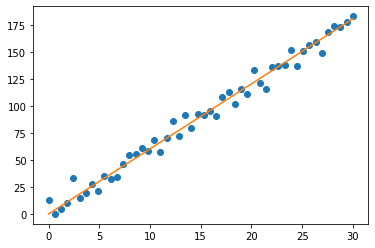

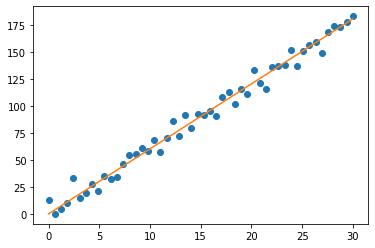

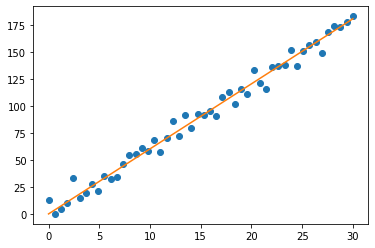

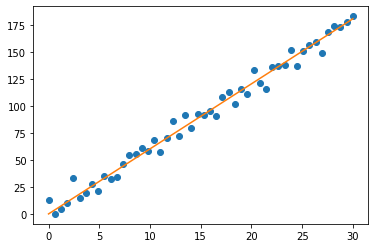

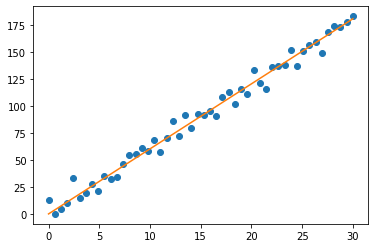

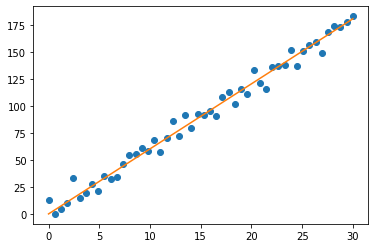

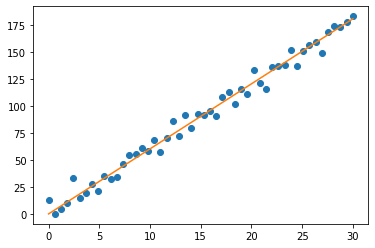

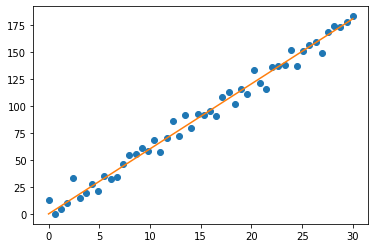

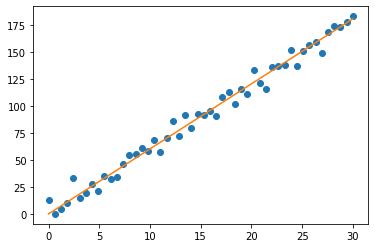

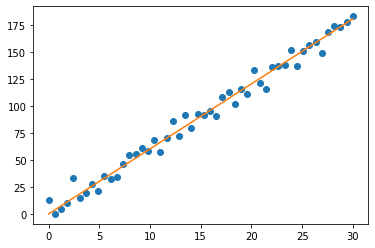

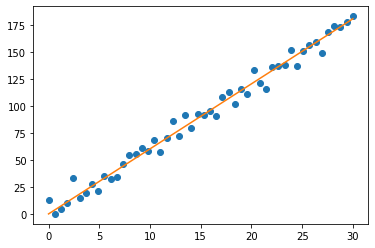

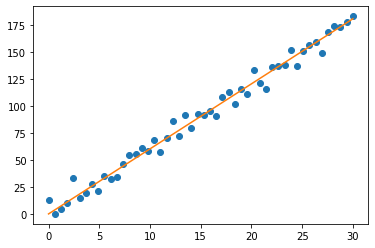

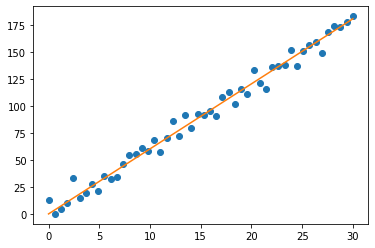

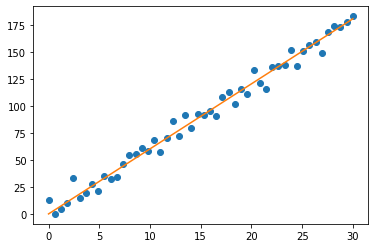

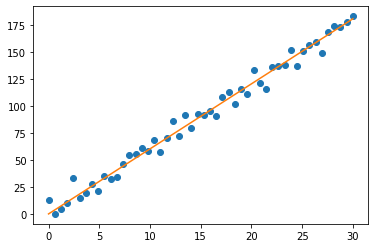

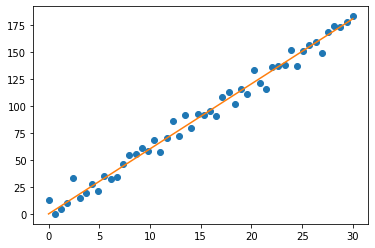

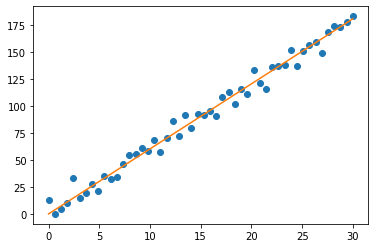

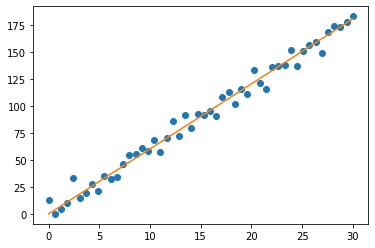

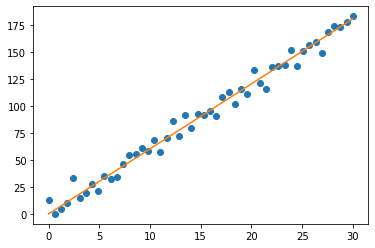

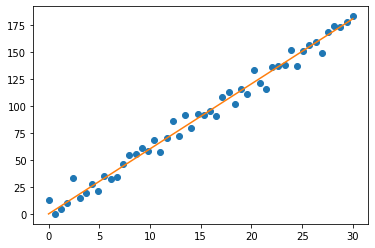

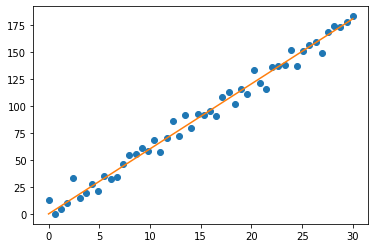

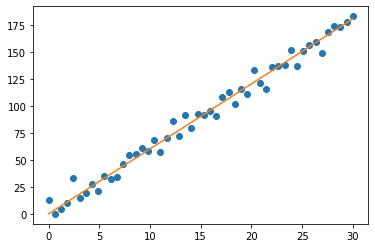

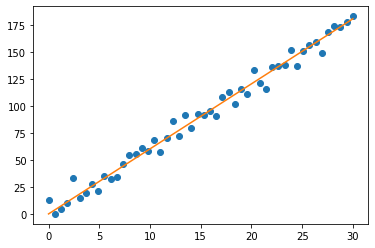

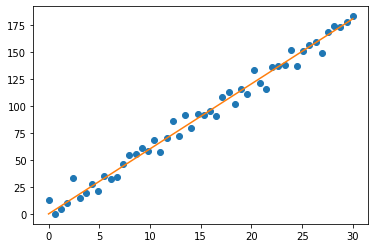

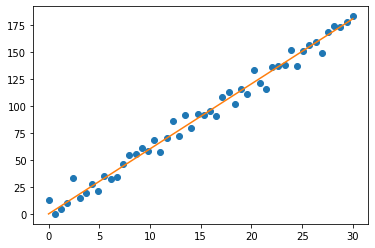

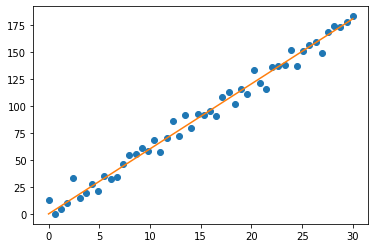

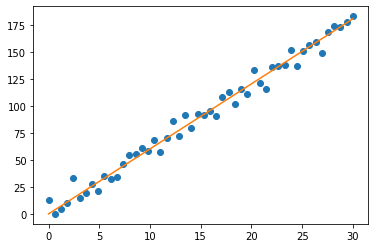

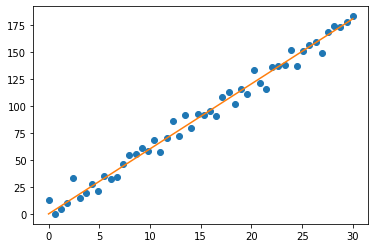

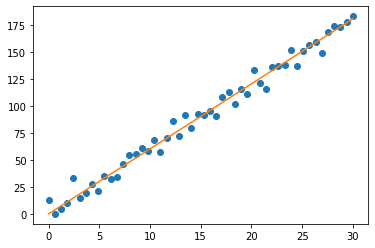

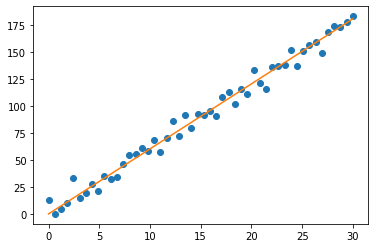

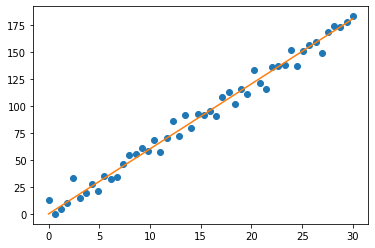

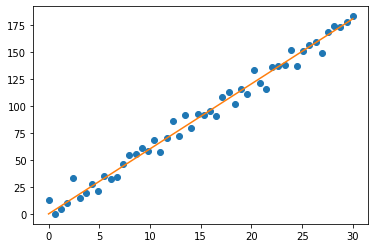

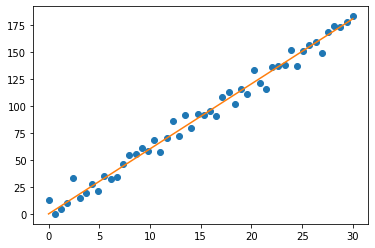

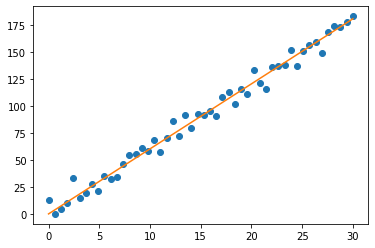

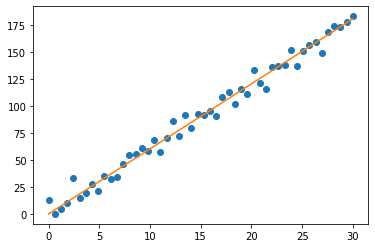

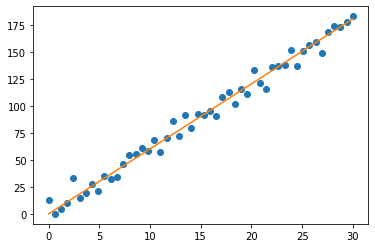

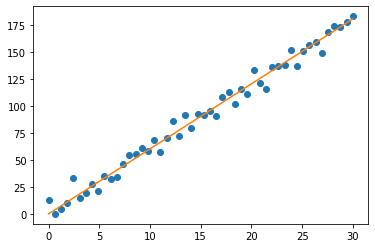

Epoch 40.000000 Cost 0.055725 Weight 6.011746 Bias 0.397602


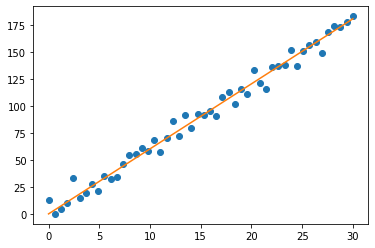

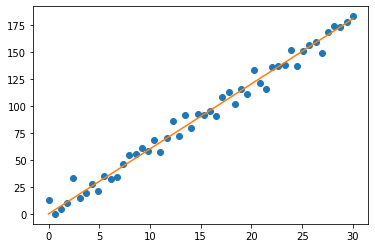

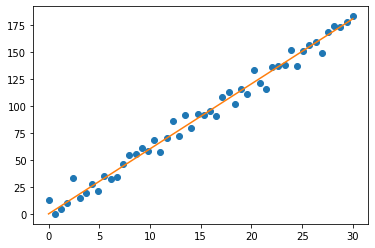

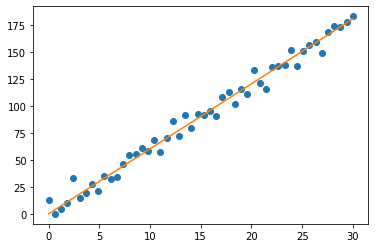

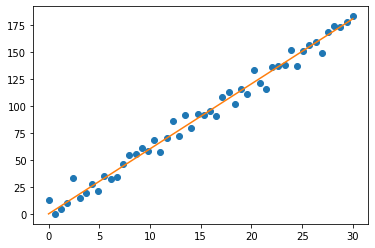

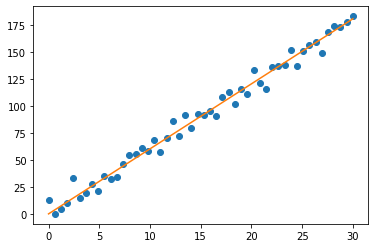

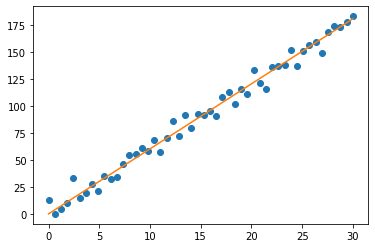

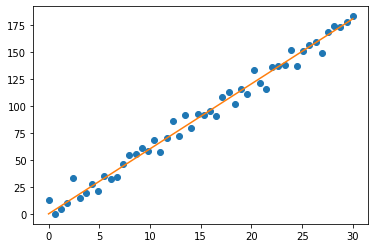

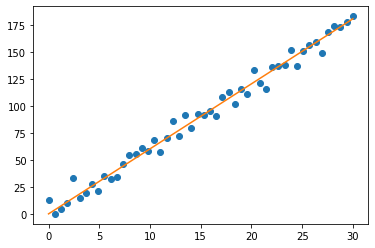

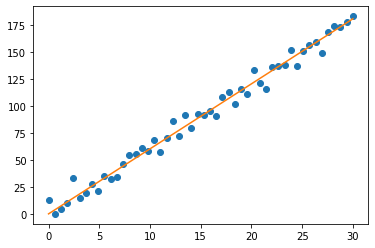

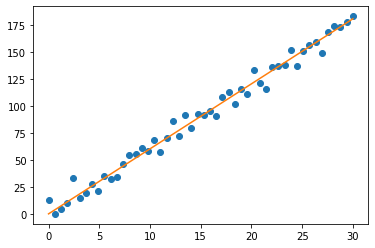

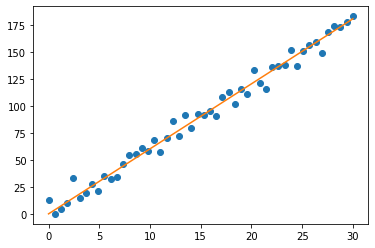

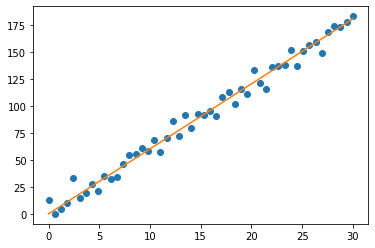

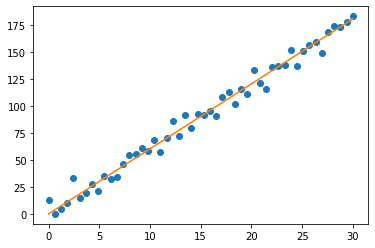

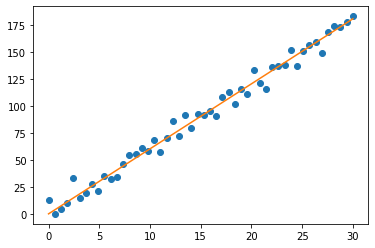

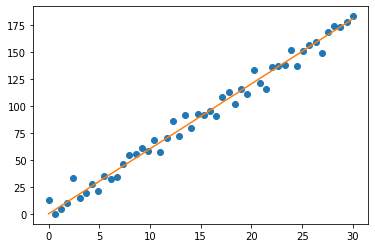

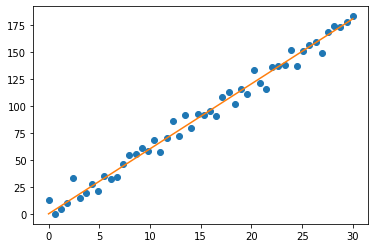

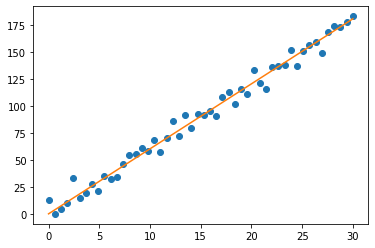

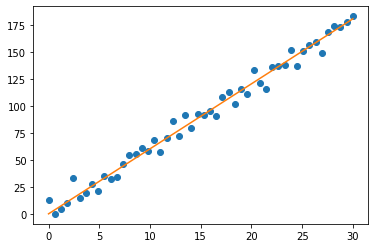

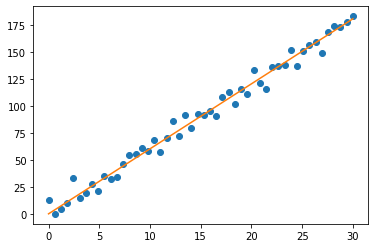

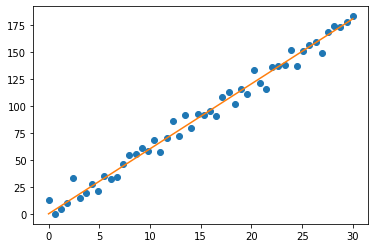

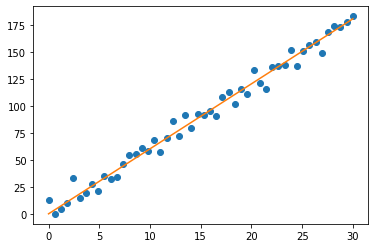

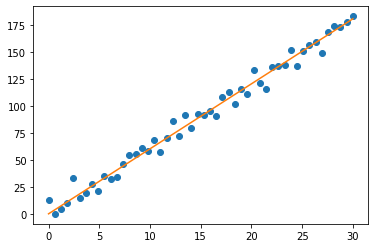

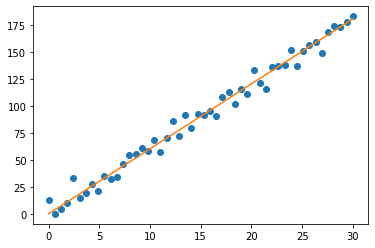

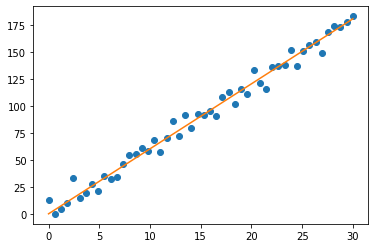

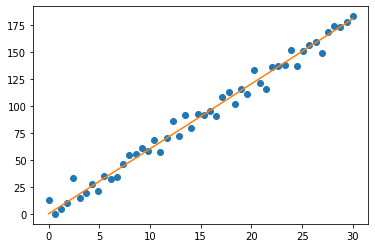

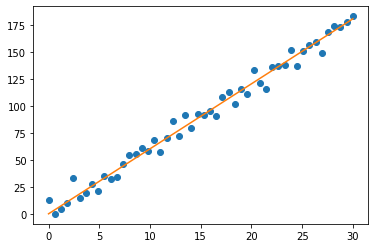

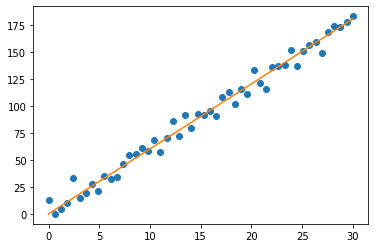

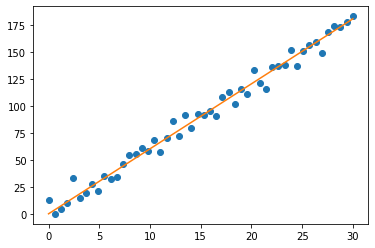

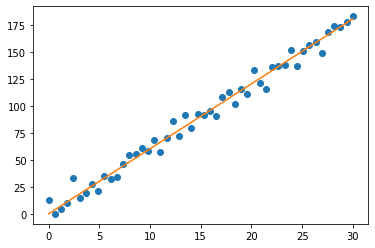

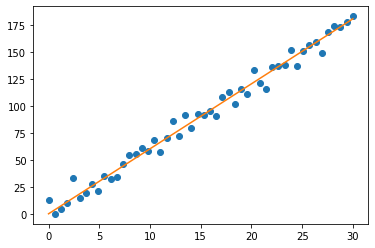

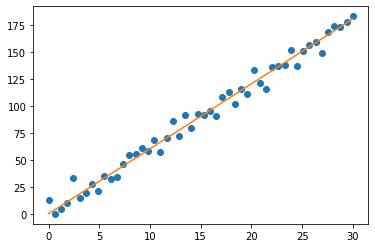

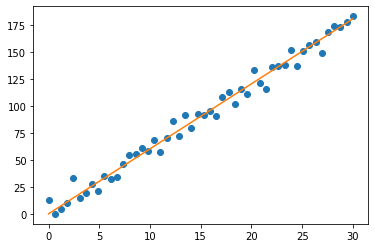

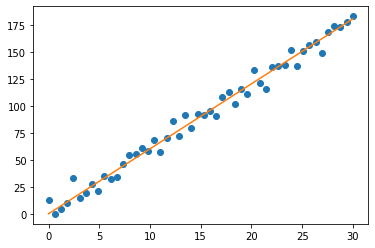

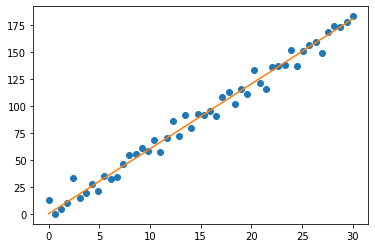

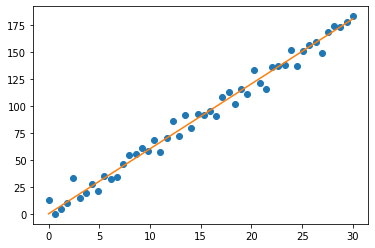

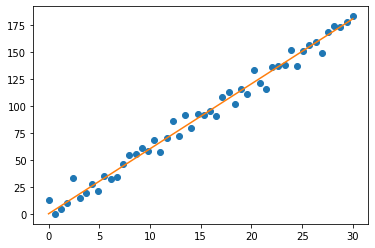

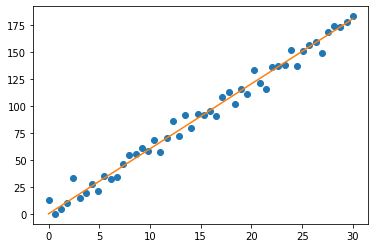

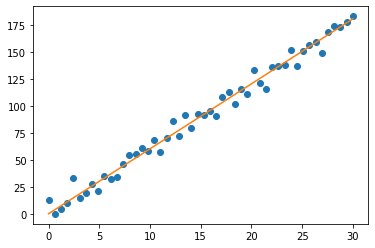

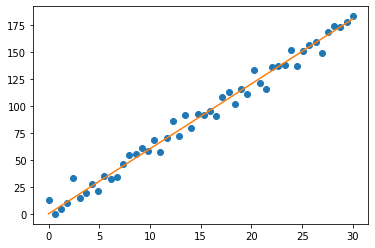

Epoch 80.000000 Cost 0.056580 Weight 6.007227 Bias 0.515116


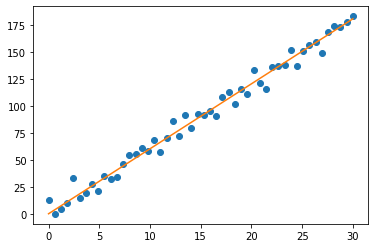

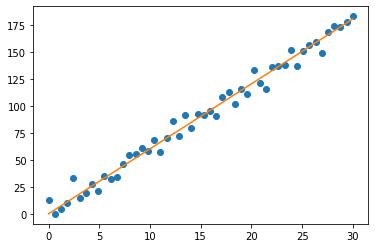

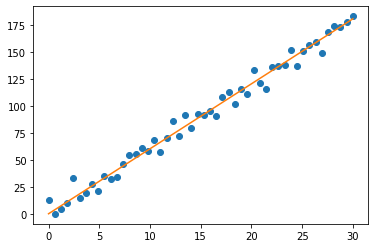

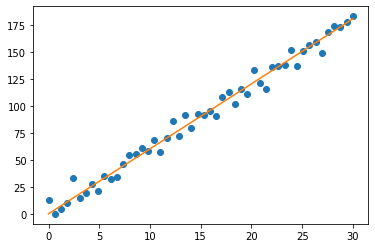

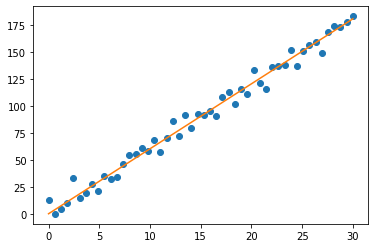

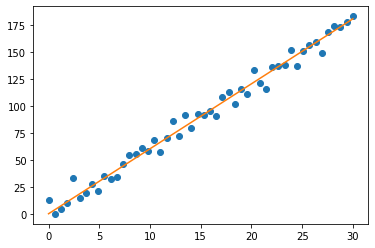

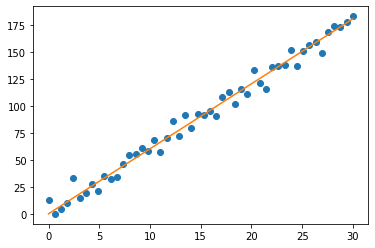

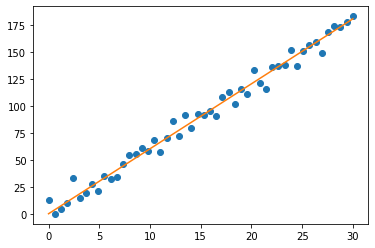

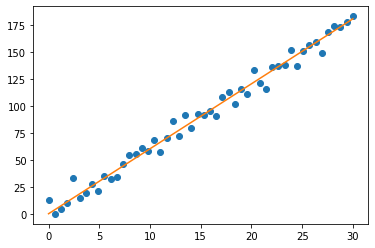

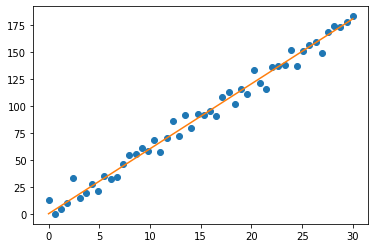

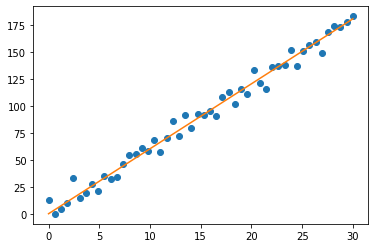

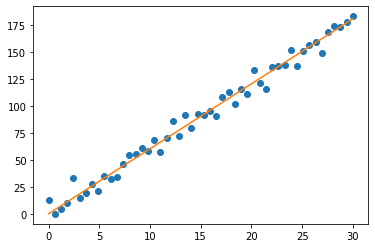

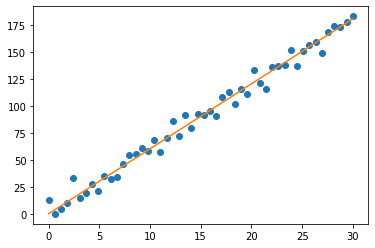

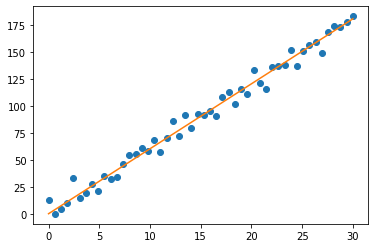

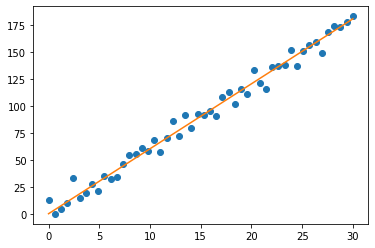

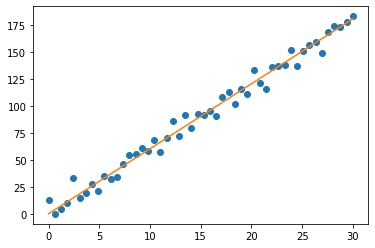

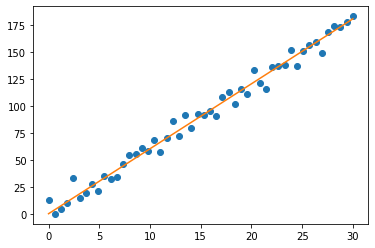

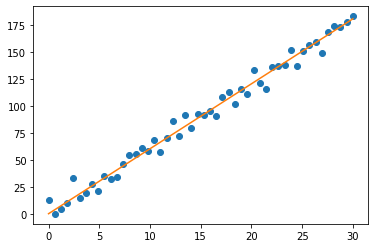

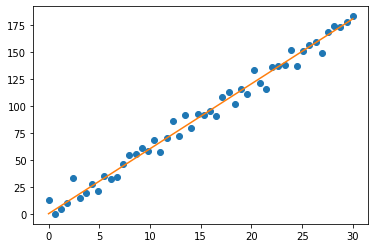

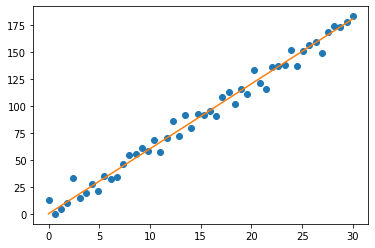

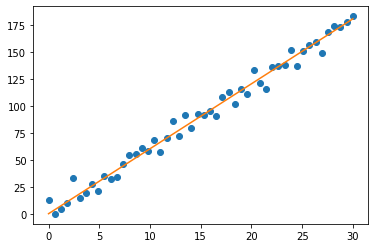

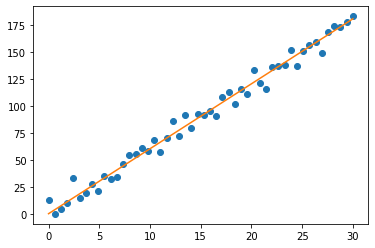

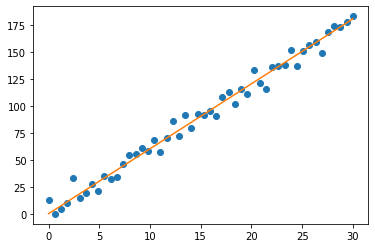

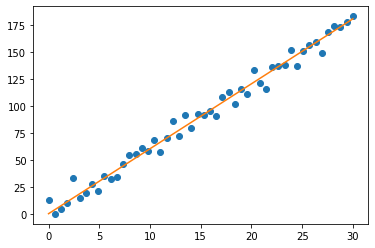

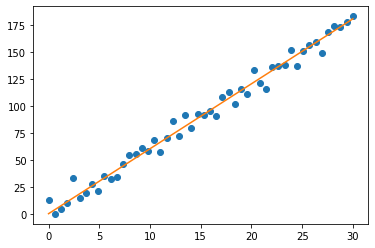

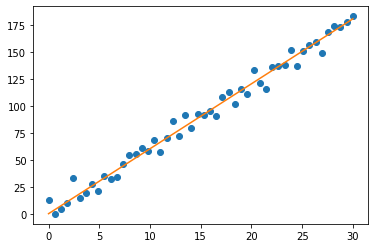

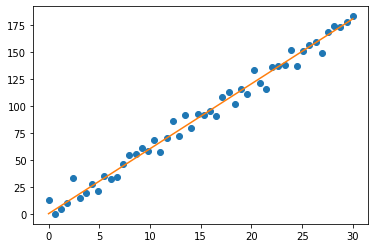

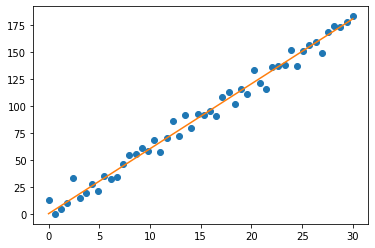

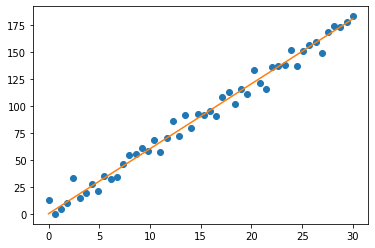

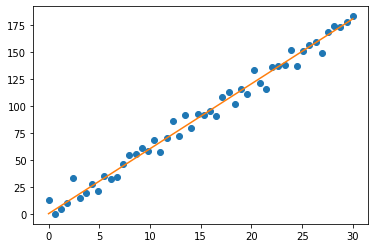

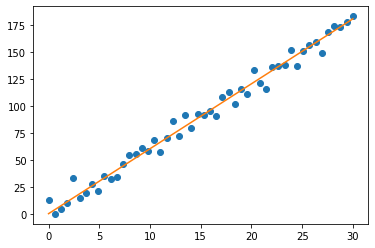

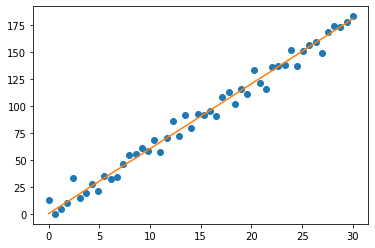

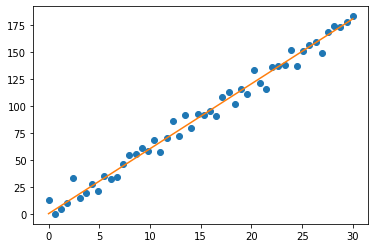

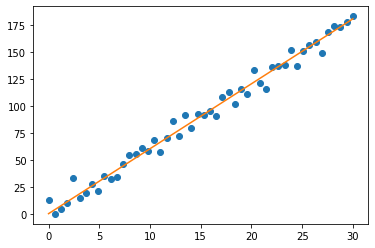

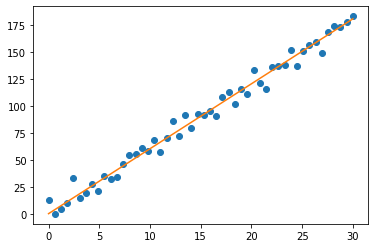

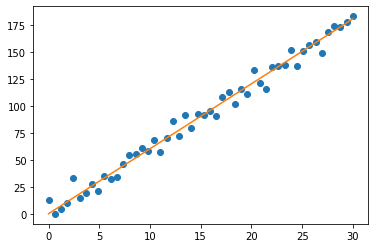

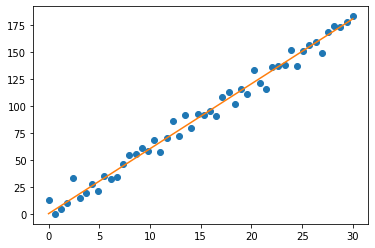

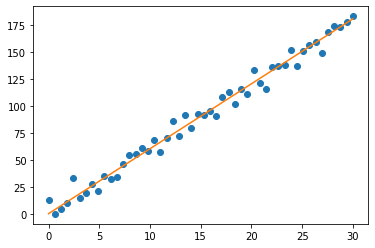

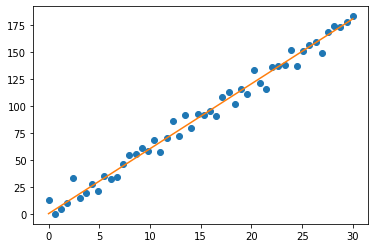

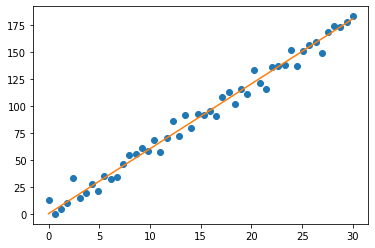

Epoch 120.000000 Cost 0.057363 Weight 6.003134 Bias 0.621529


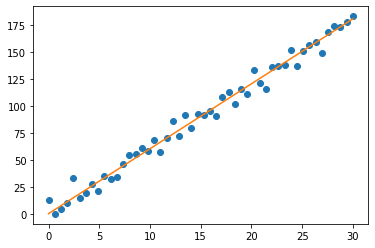

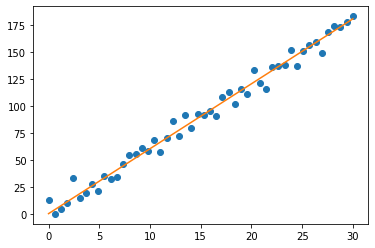

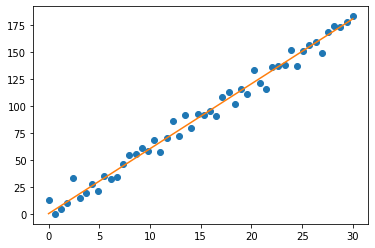

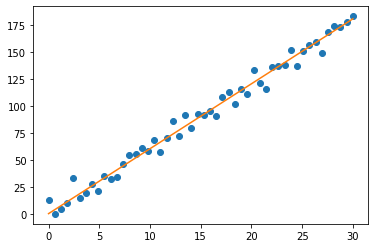

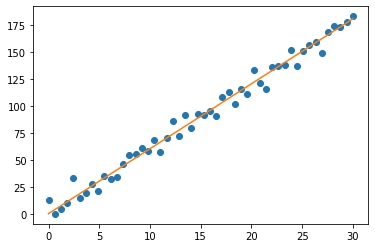

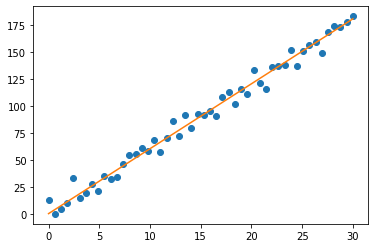

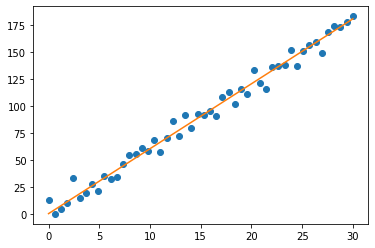

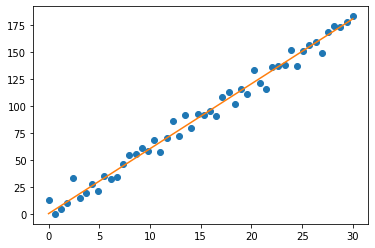

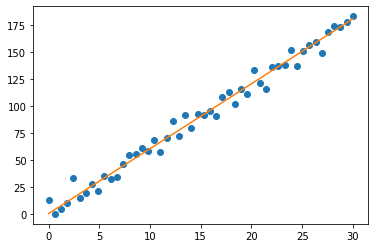

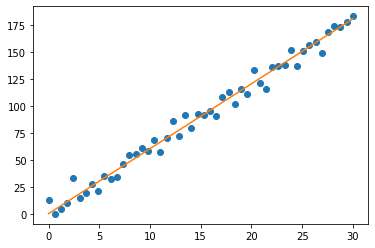

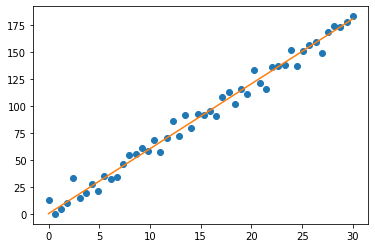

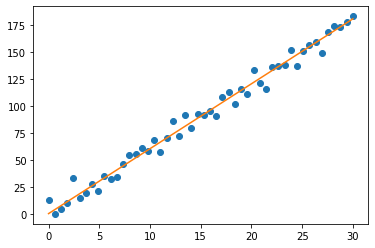

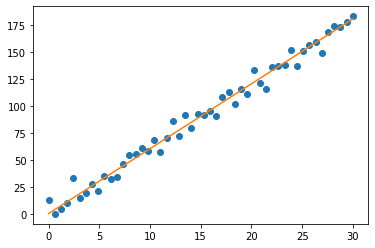

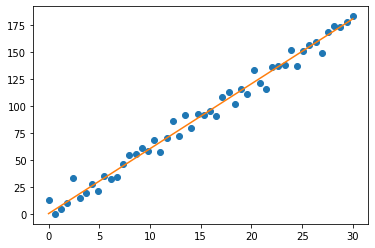

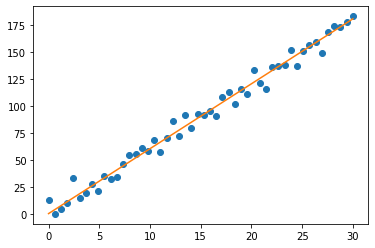

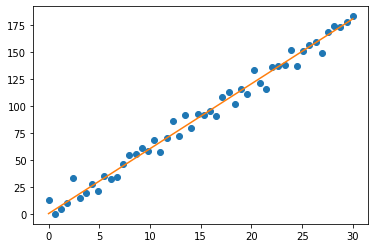

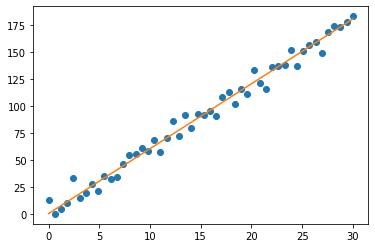

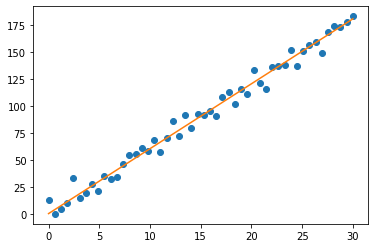

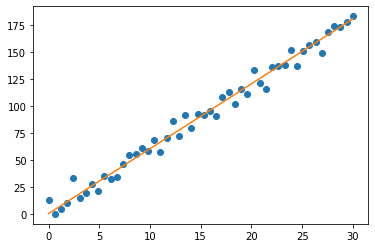

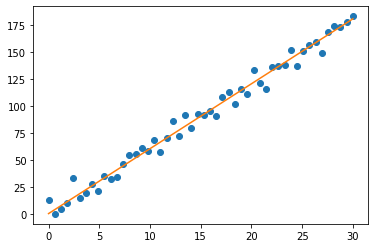

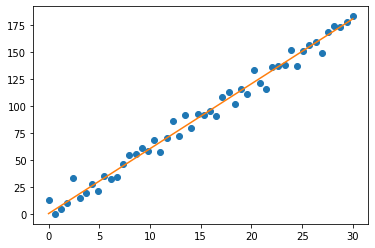

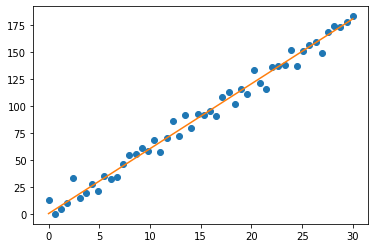

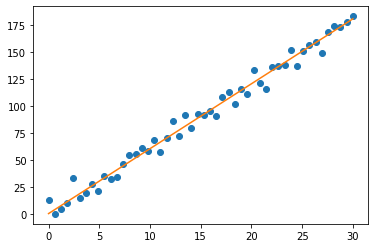

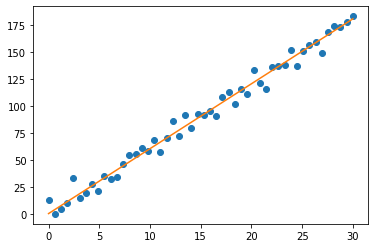

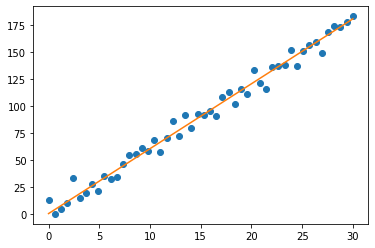

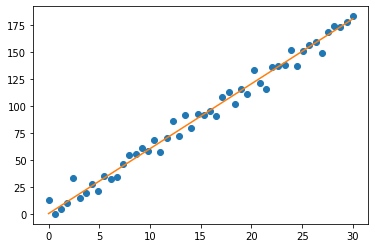

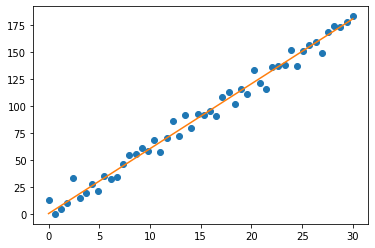

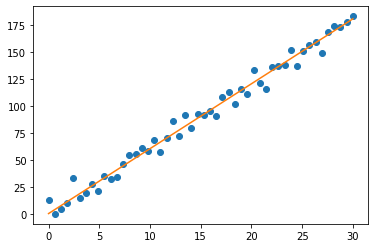

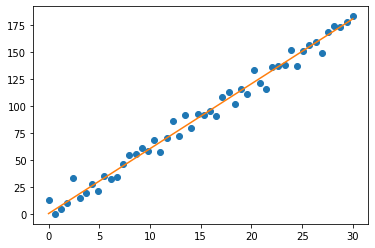

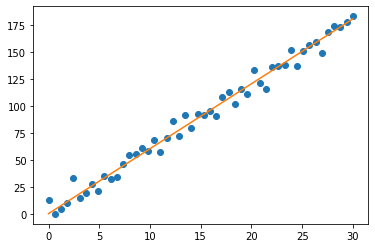

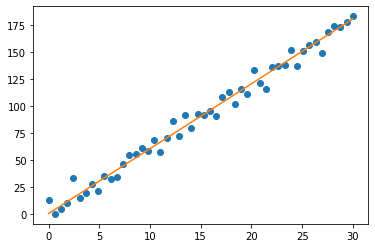

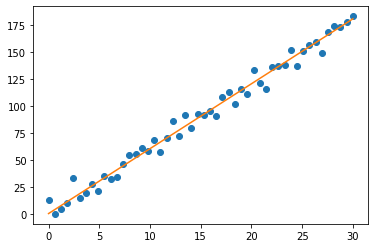

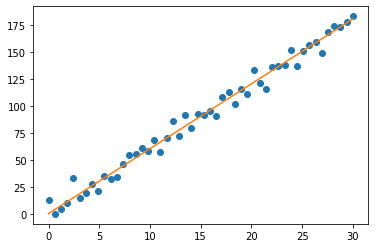

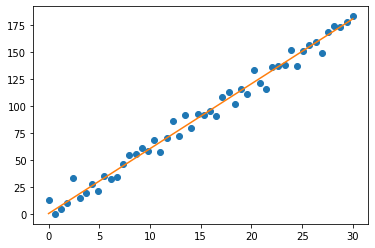

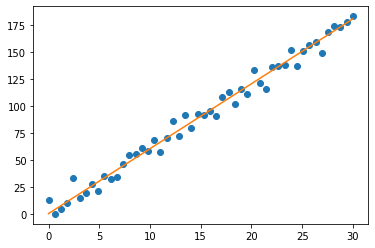

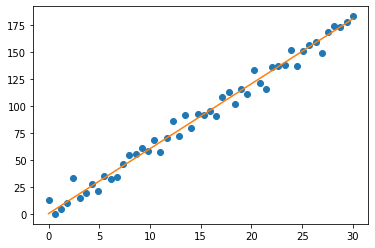

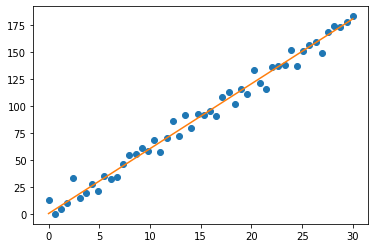

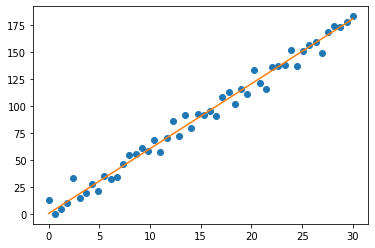

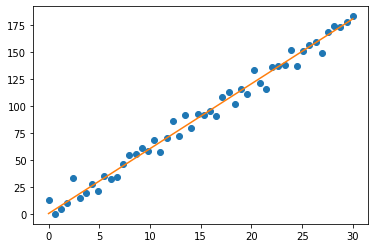

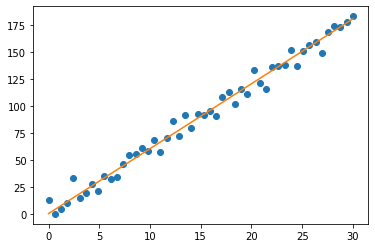

Epoch 160.000000 Cost 0.058075 Weight 5.999428 Bias 0.717888


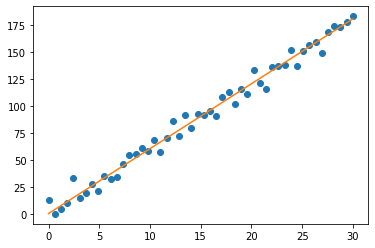

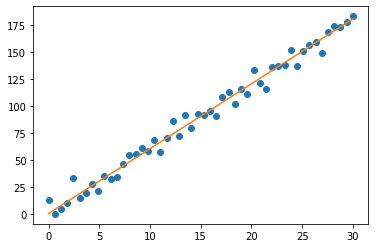

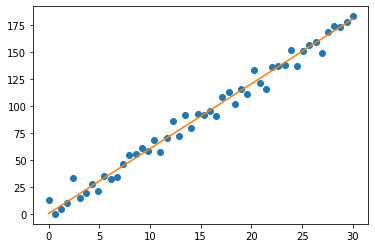

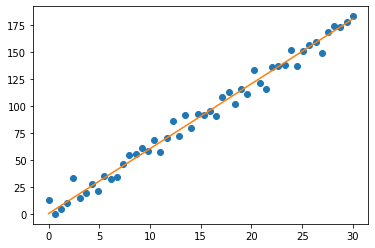

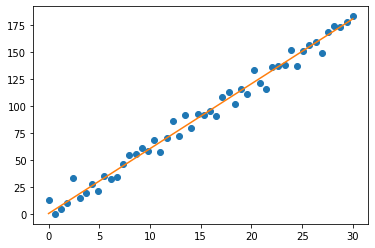

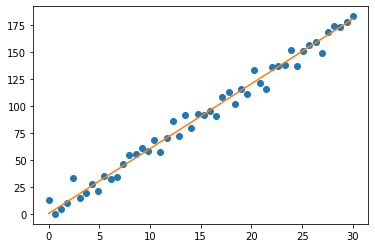

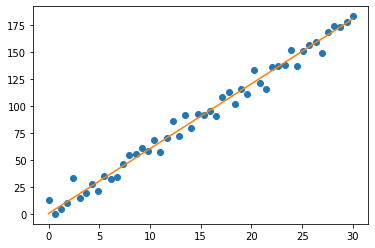

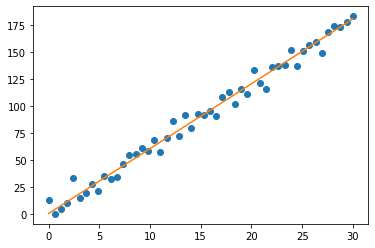

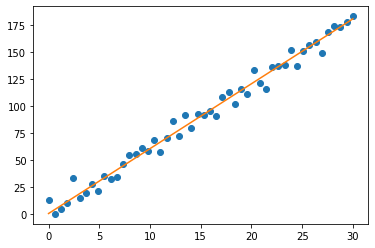

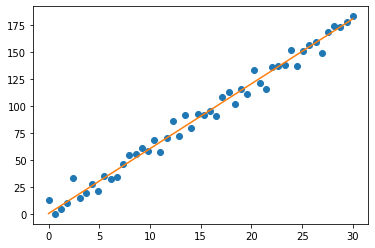

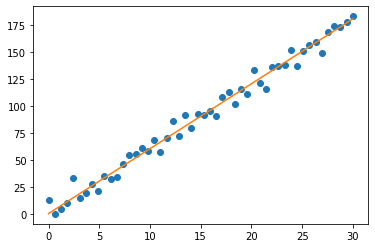

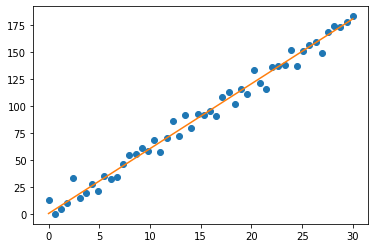

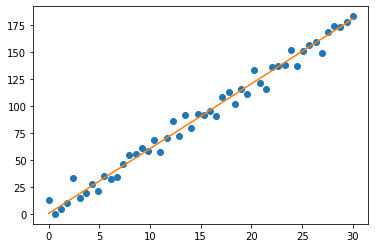

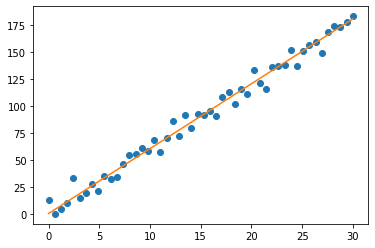

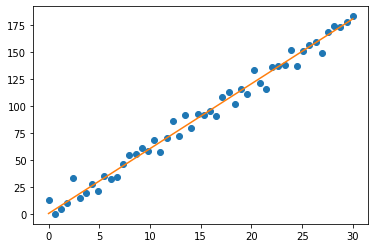

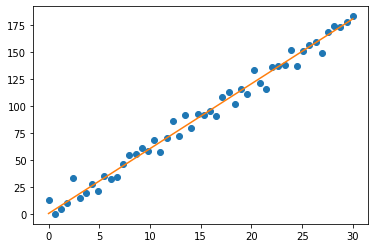

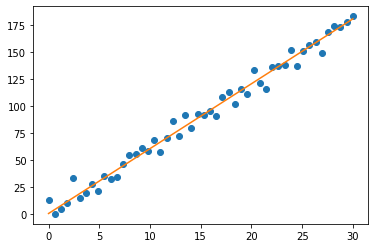

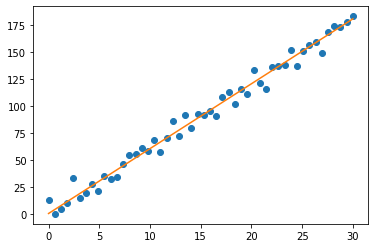

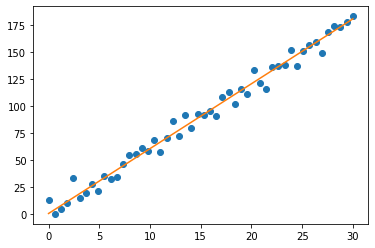

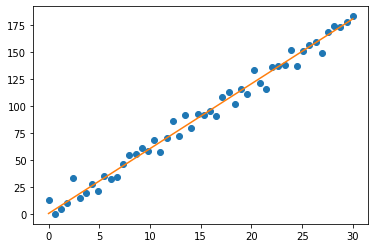

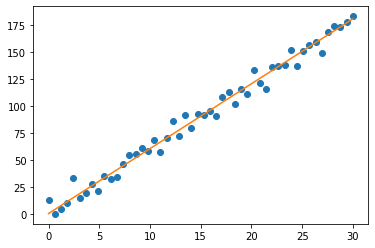

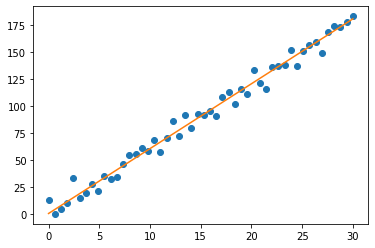

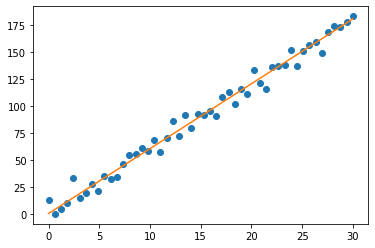

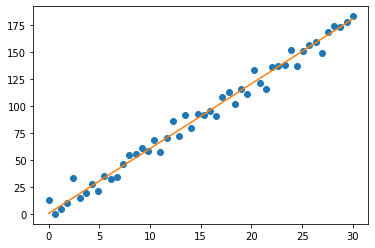

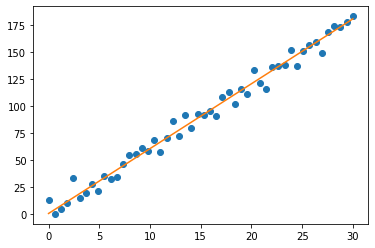

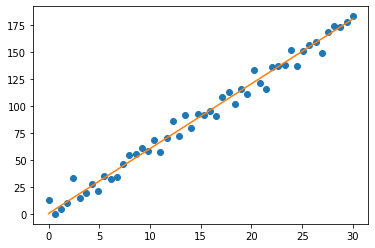

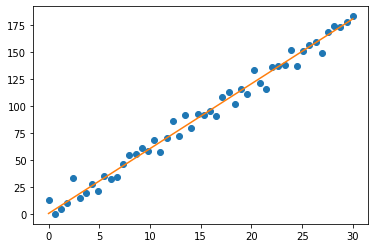

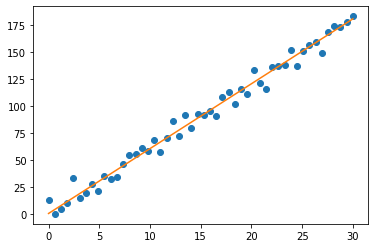

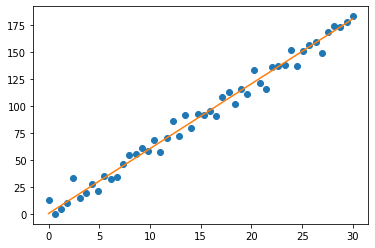

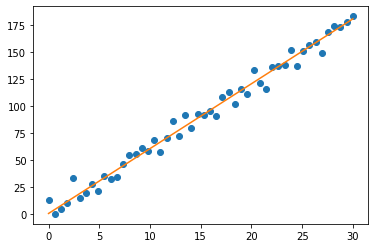

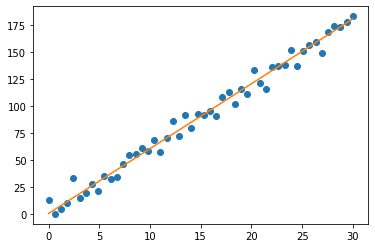

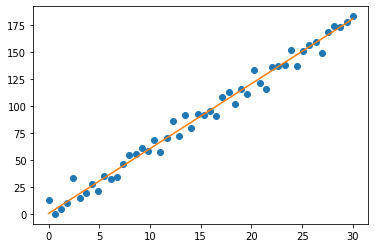

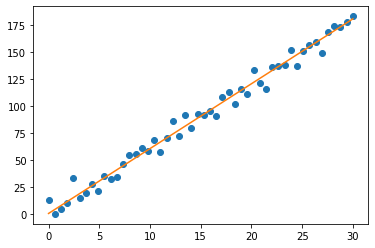

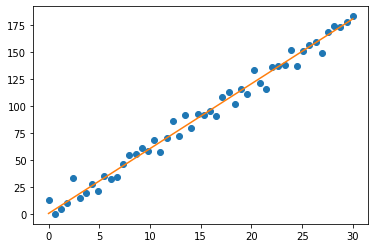

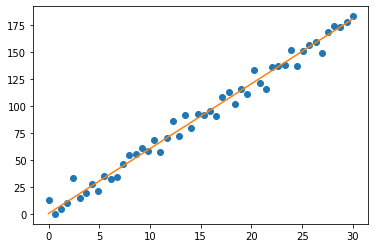

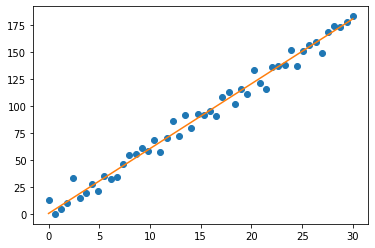

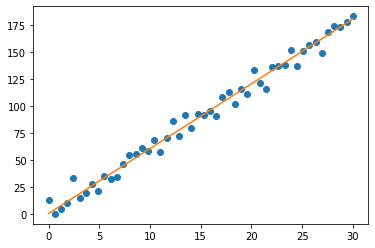

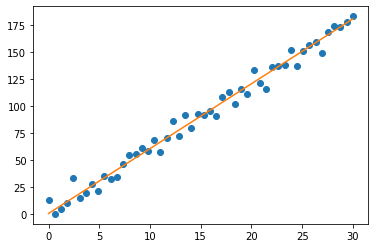

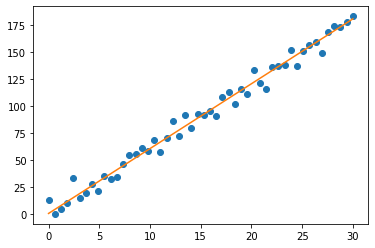

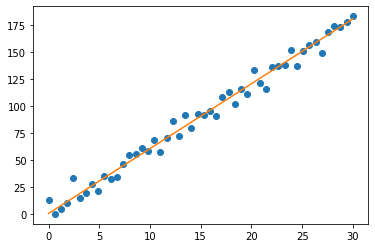

Epoch 200.000000 Cost 0.058723 Weight 5.996072 Bias 0.805144


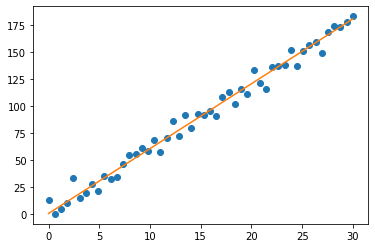

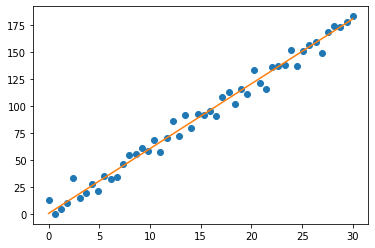

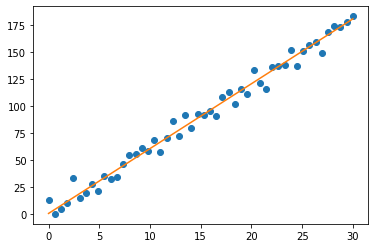

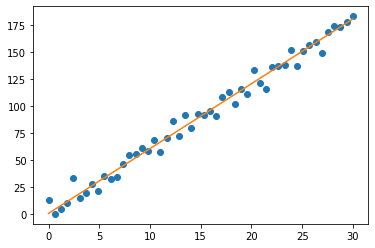

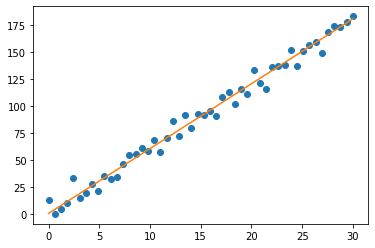

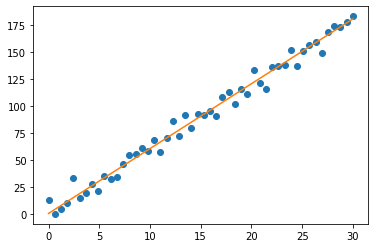

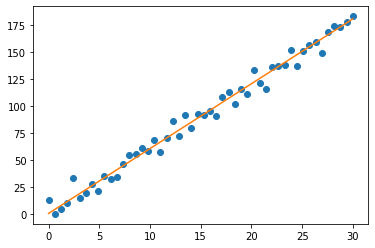

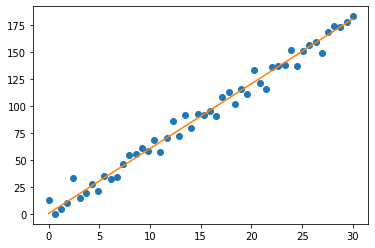

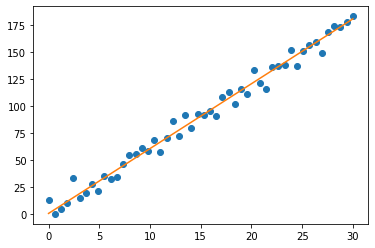

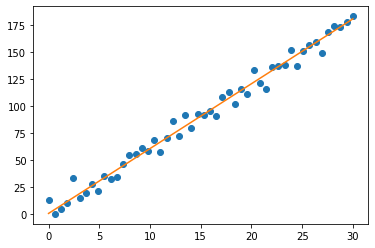

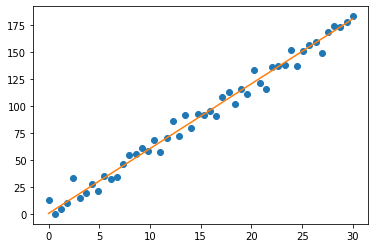

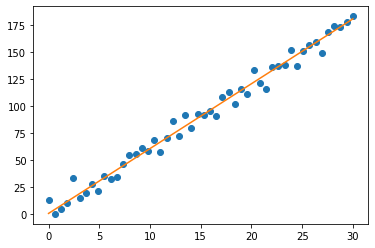

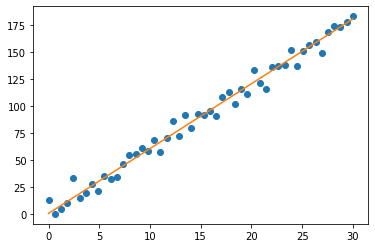

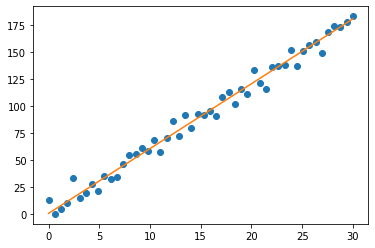

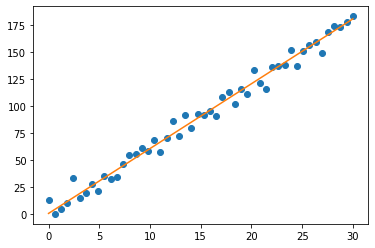

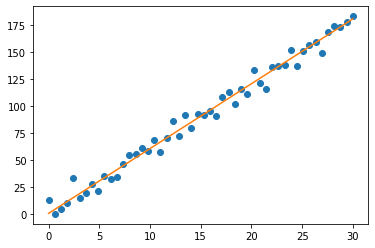

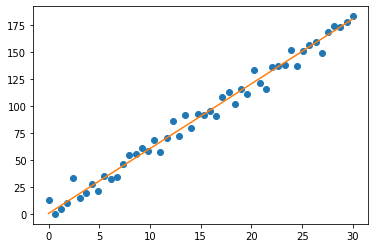

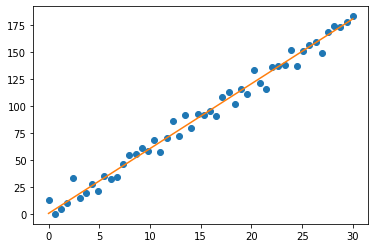

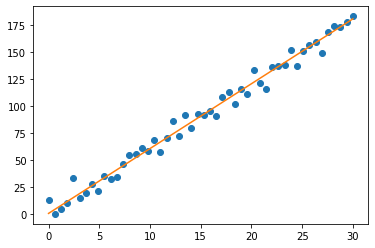

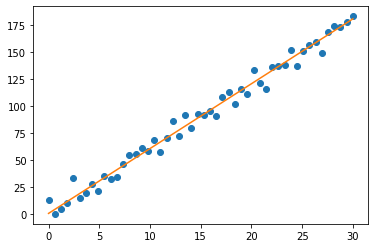

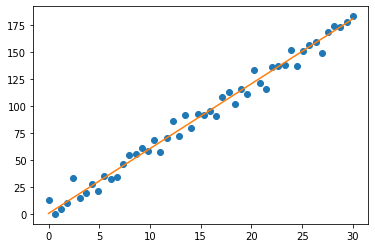

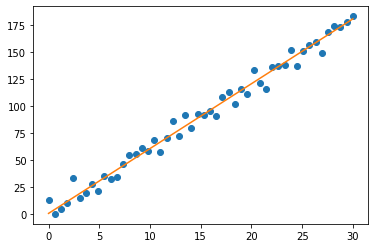

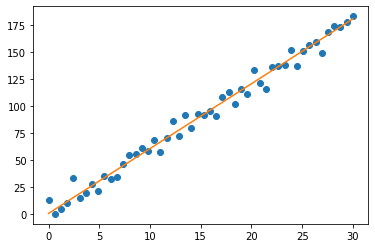

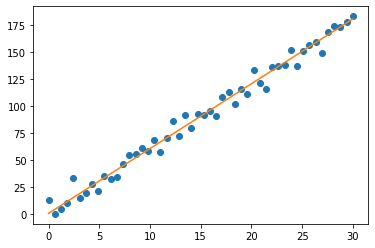

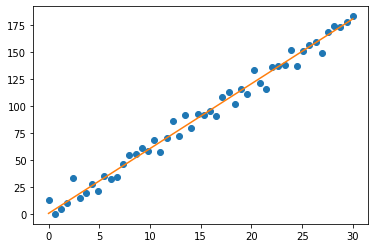

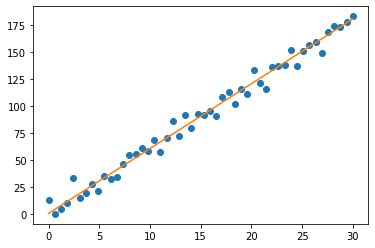

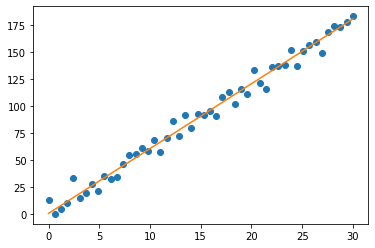

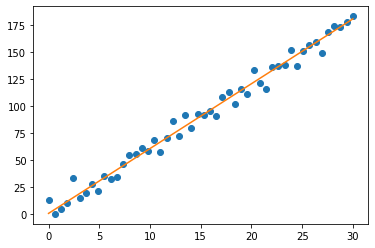

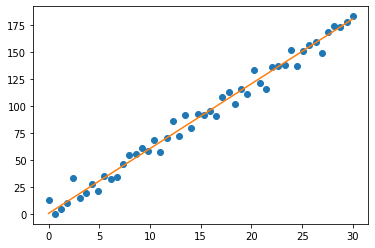

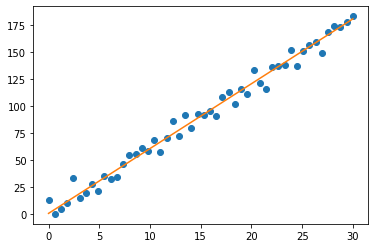

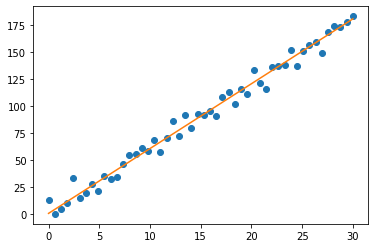

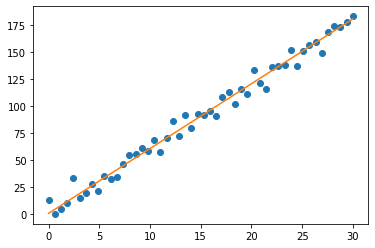

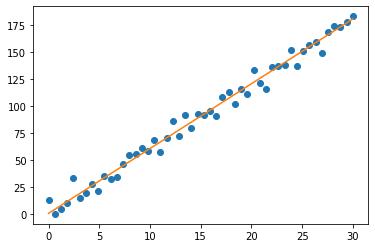

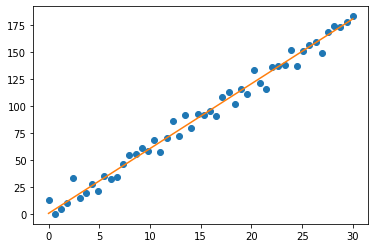

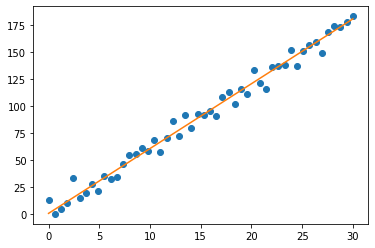

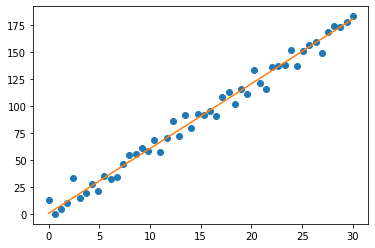

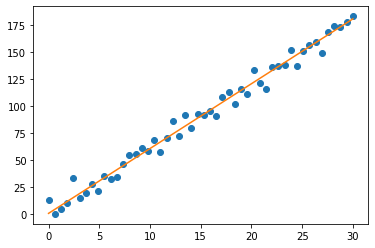

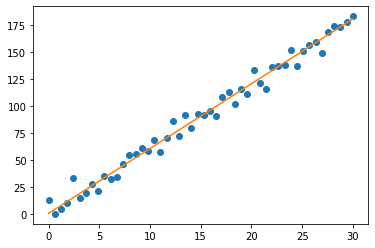

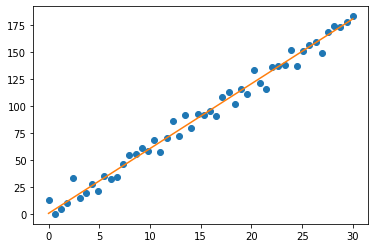

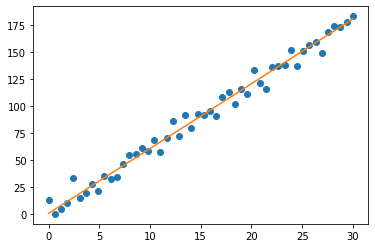

Epoch 240.000000 Cost 0.059312 Weight 5.993034 Bias 0.884157


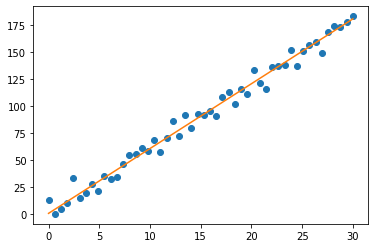

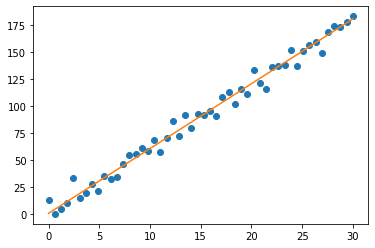

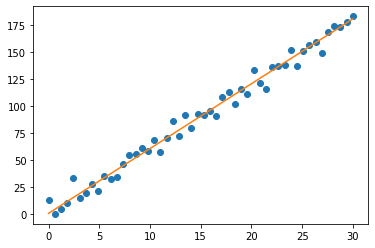

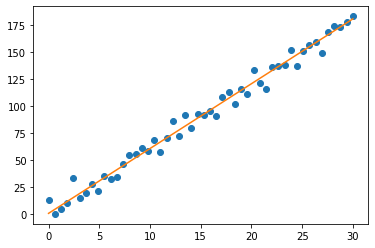

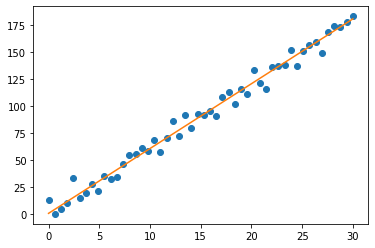

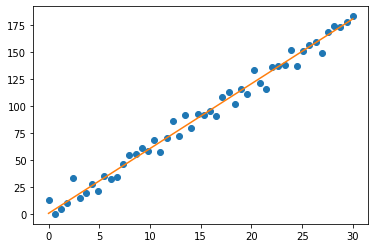

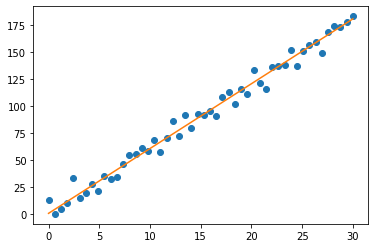

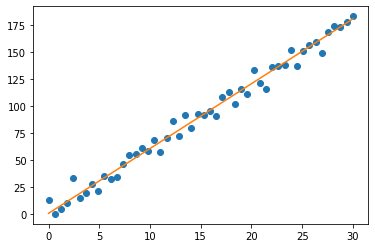

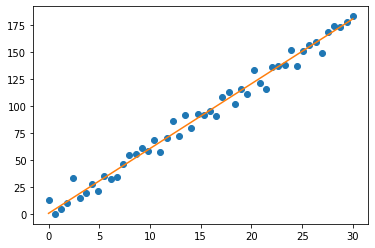

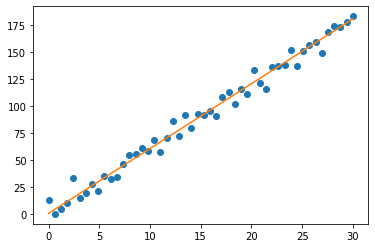

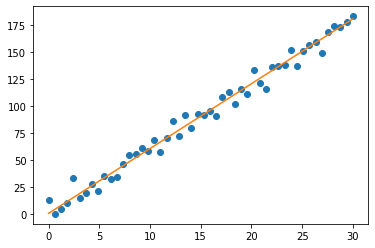

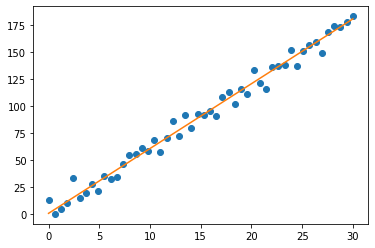

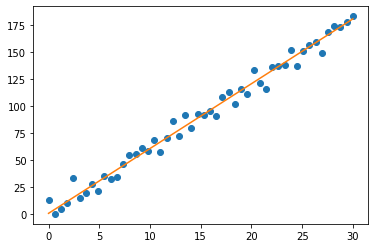

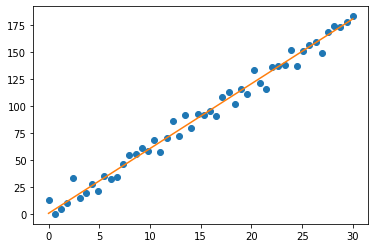

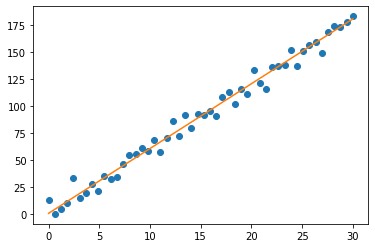

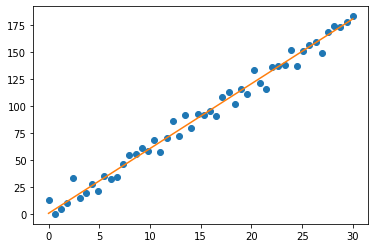

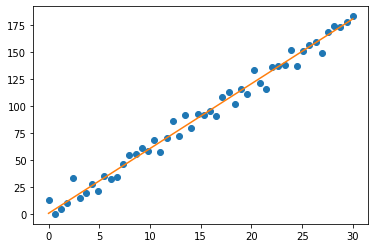

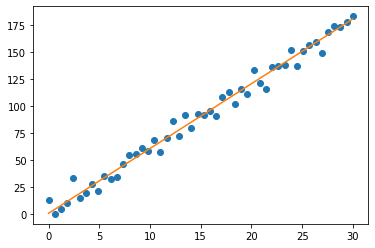

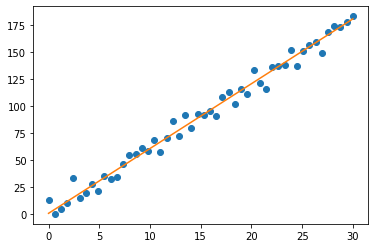

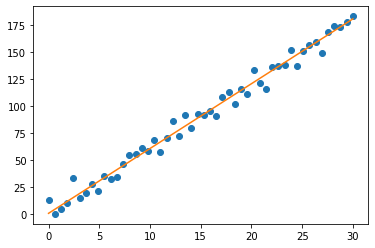

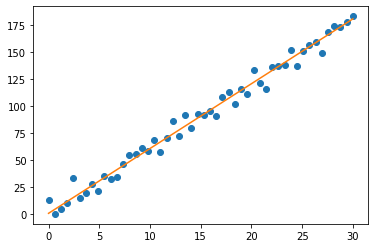

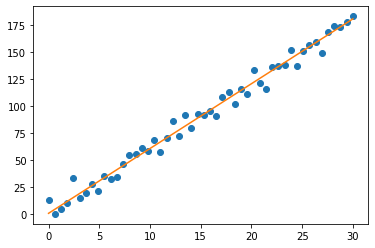

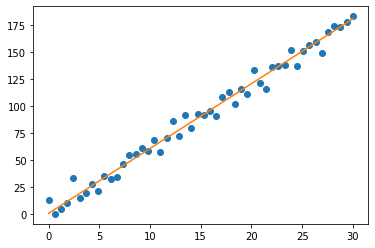

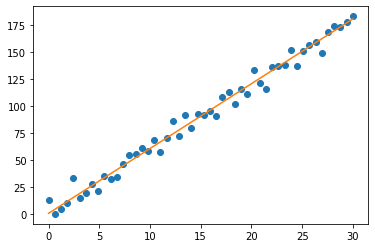

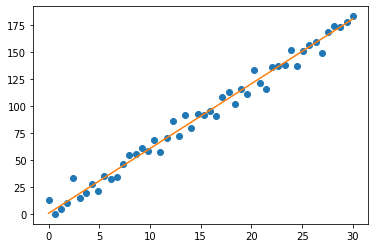

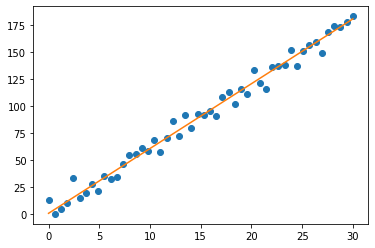

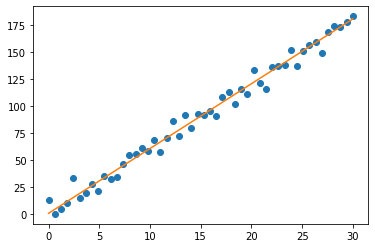

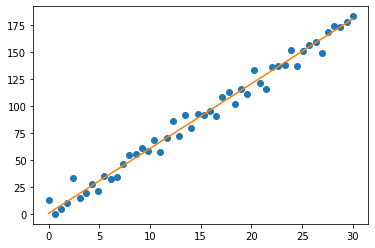

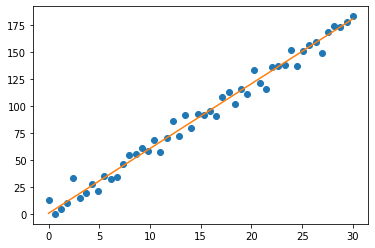

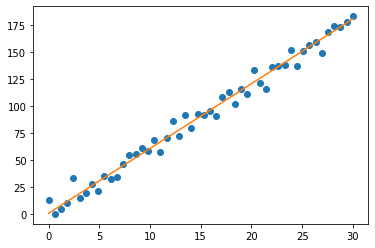

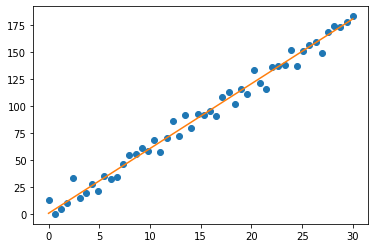

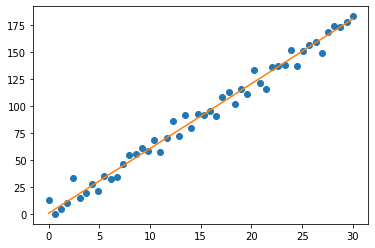

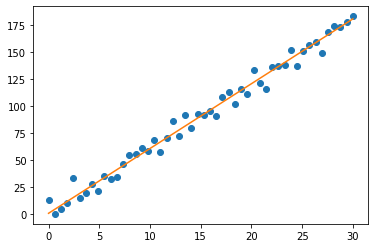

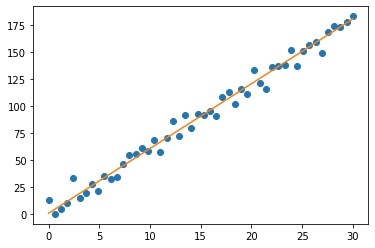

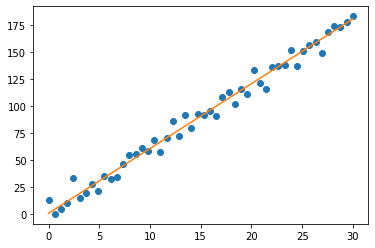

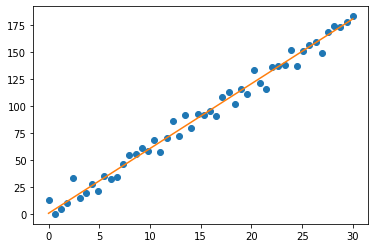

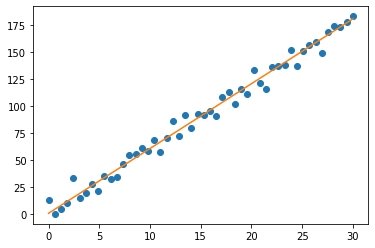

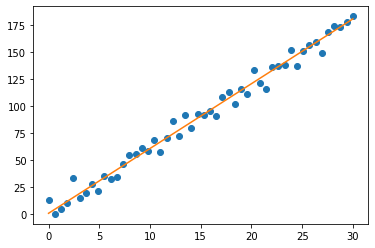

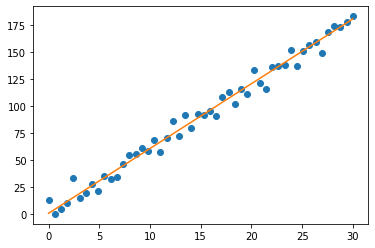

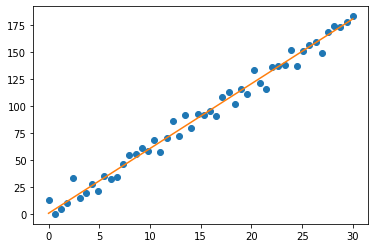

Epoch 280.000000 Cost 0.059849 Weight 5.990283 Bias 0.955706


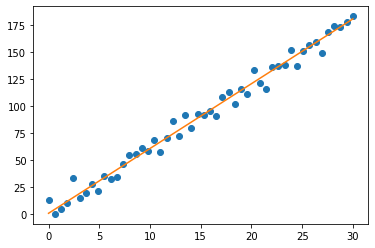

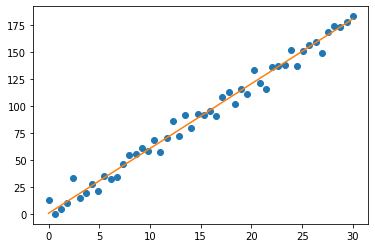

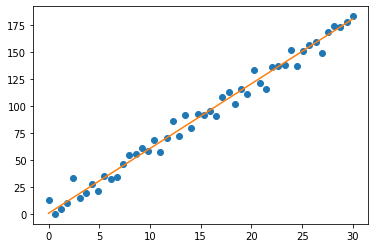

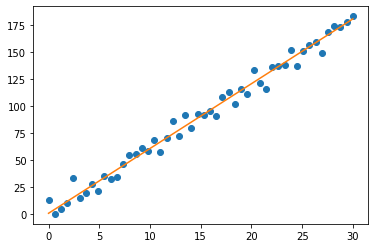

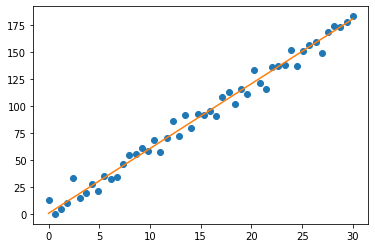

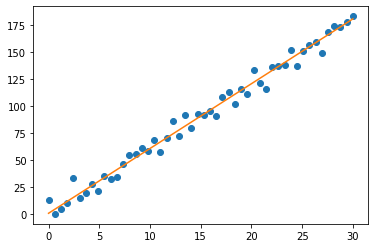

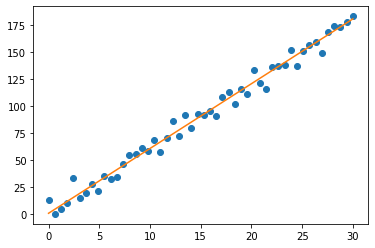

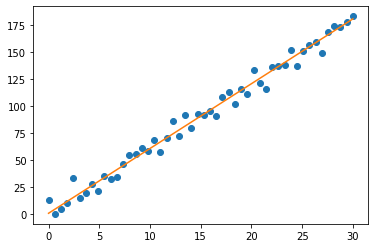

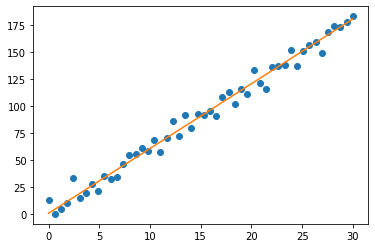

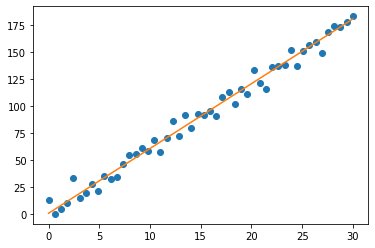

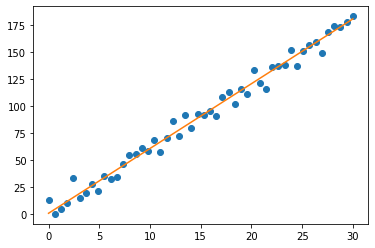

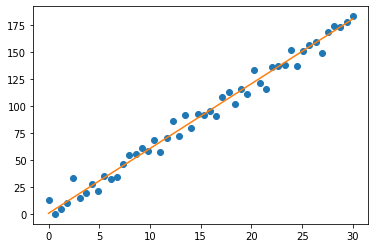

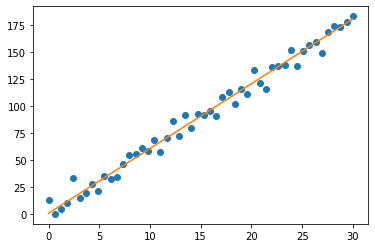

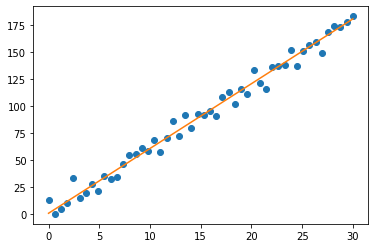

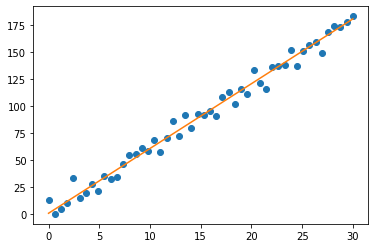

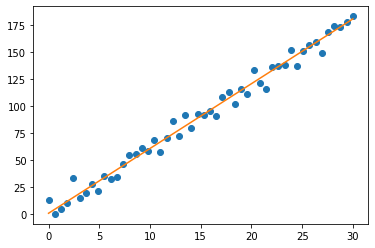

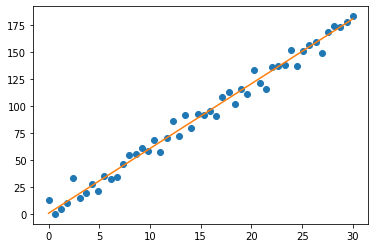

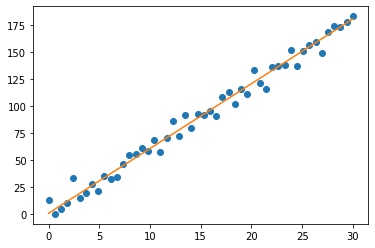

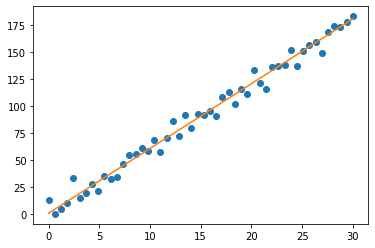

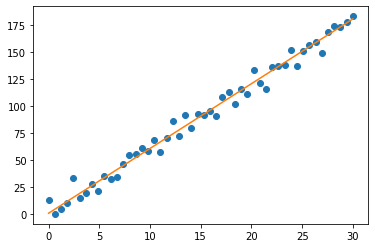

In [ ]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict ={X : x, Y : y})
      print('Epoch %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
    Weight = sess.run(W)
    Bias = sess.run(B)

    plt.plot(x_train, y_train, 'o')
    plt.plot(x_train, Weight*x_train+ Bias)
    plt.show()

# Visual Data Graph of Bias, Cost and Weight is shown below

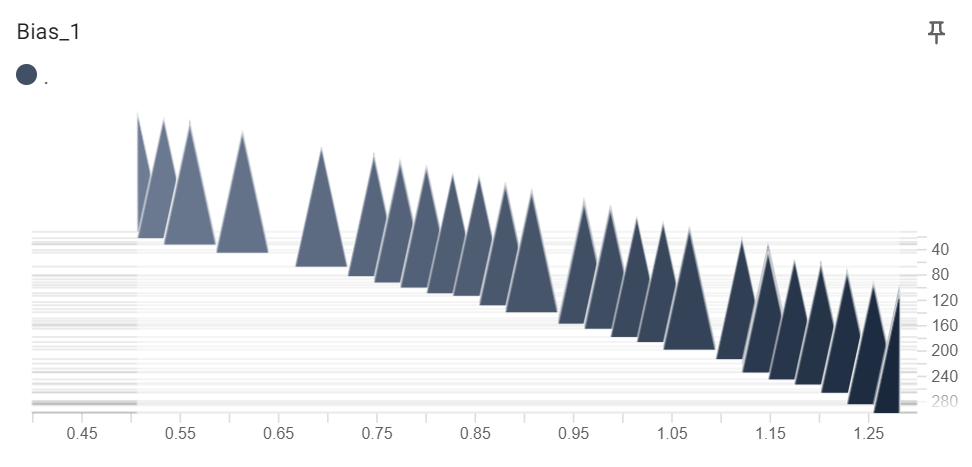

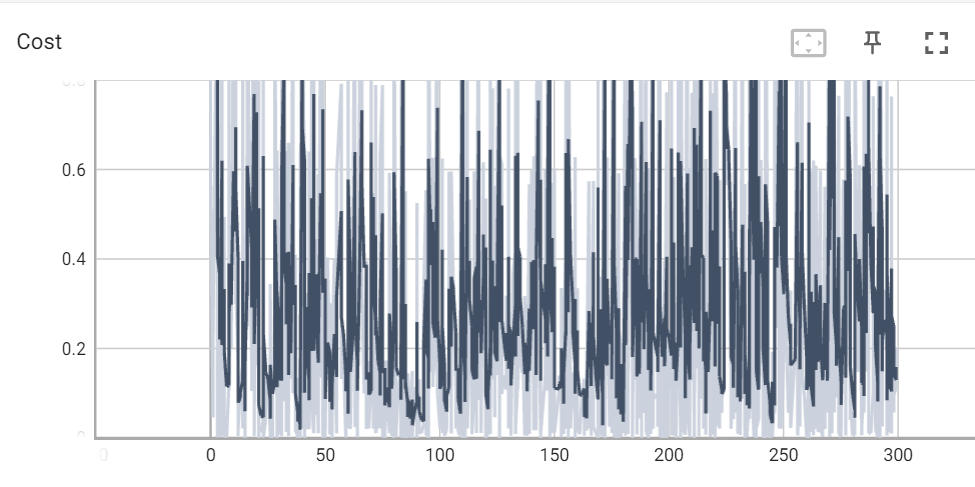

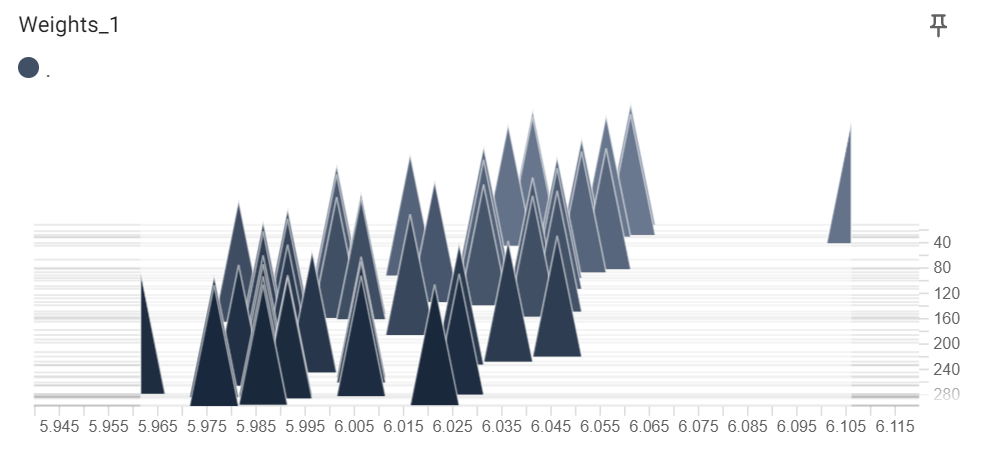

In [ ]:
# Create the model for regression
with tf.name_scope("Model") as scope:
  prediction = W*X + B

# Add summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
bias_histogram = tf.summary.histogram("Bias", B)

# Cost function
with tf.name_scope("Cost_function") as scope:
  cost_iteration = tf.reduce_sum((prediction-Y)**2)/(2*sample_points)

# Record the scalar summary of the cost function
cost_summary = tf.summary.scalar("Cost", cost_iteration)

In [ ]:
#Define the optimizer
with tf.name_scope("Training") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

# Initialize the variables
init = tf.global_variables_initializer()

#Merge all the summaries into a single operator
merged_summary = tf.summary.merge_all()

### Define the TensorFlow
- The output shows that costs are decreasing, and weights and 
biases are optimising.
- As a result, the green line is the best-suited line for this noisy 
observation in terms of the least square error


Epochs 0.000000 Cost 0.919707 Weight 5.775624 Bias 0.251755
Epochs 40.000000 Cost 0.055725 Weight 6.011746 Bias 0.397602
Epochs 80.000000 Cost 0.056580 Weight 6.007227 Bias 0.515116
Epochs 120.000000 Cost 0.057363 Weight 6.003134 Bias 0.621529
Epochs 160.000000 Cost 0.058075 Weight 5.999428 Bias 0.717888
Epochs 200.000000 Cost 0.058723 Weight 5.996072 Bias 0.805144
Epochs 240.000000 Cost 0.059312 Weight 5.993034 Bias 0.884157
Epochs 280.000000 Cost 0.059849 Weight 5.990283 Bias 0.955706


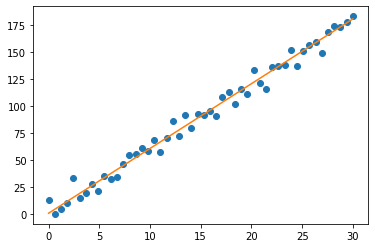

In [ ]:
# Define the tensorflow session
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
      sess.run(optimizer, feed_dict = {X : x, Y : y})

      # Write logs for each epochs
      summary_epochs = sess.run(merged_summary, feed_dict = {X : x, Y : y})
      writer.add_summary(summary_epochs, epoch)
    if not epoch%40:
      W1 = sess.run(W)
      B1 = sess.run(B)
      cost_iter = sess.run(cost_iteration, feed_dict = {X : x, Y : y})
      print('Epochs %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1, B1))
  Weight = sess.run(W)
  Bias = sess.run(B)

  plt.plot(x_train, y_train, 'o')
  plt.plot(x_train,Weight*x_train+Bias)
  plt.show()

In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Download the event file to the 
new folder on your Desktop, 
and name it as log folder.**

In [ ]:
!wget https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip

--2022-10-11 09:33:37--  https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8454063 (8.1M) [application/octet-stream]
Saving to: ‘ngrok-v3-stable-linux-amd64.zip’

ngrok-v3-stable-lin 100%[===================>]   8.06M  --.-KB/s    in 0.1s    

2022-10-11 09:33:37 (62.7 MB/s) - ‘ngrok-v3-stable-linux-amd64.zip’ saved [8454063/8454063]



In [ ]:
!unzip ngrok-v3-stable-linux-amd64.zip

Archive:  ngrok-v3-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [ ]:
get_ipython().system_raw('./ngrok http 6006 &')

In [ ]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://79c9-35-245-61-132.ngrok.io


In [ ]:
pip install tensorflow==1.15.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## In order to achieving the target import the necessary libraries

In [ ]:
# Import the dependencies
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Import the MNIST dataset and store it in the variable.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


## Determine how many images are for training, testing and validation.

In [ ]:
num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}")


MNIST Datasize: Training samples: {0}, Testing samples: {1}


## Determine the network parameters of the Neural Network.


In [ ]:
# Network parameters of Neural Network
n_input = 784     # Input image of size 28 x 28
n_hidden_1 = 512  # First hidden layer
n_hidden_2 = 256  # Second hidden layer
n_hidden_3 = 128  # Third hidden layer
n_output = 10     # Output layer having (0-9) digits

## Define the hyperparameters. 

In [ ]:
learning_rate = 1e-4
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32)

## Build the network as a TensorFlow graph.

In [ ]:
# Building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

## Weights and Biases are the parameters of the network that will be updated in training

In [ ]:
nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
             "Wout":tf.Variable(tf.truncated_normal([n_hidden_3, n_output]))
}

nn_bias = { "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
            "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
            "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
            "B4": tf.Variable(tf.truncated_normal([n_output])),  
           }

## Create a NN model:
-  Define the operations that will manipulate tensors (layers of the networks)

In [ ]:
nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]),nn_bias["B2"])
nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer_3, keep_prob)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]), nn_bias["B4"])

## In building the graph:
- define the loss, optimizer, prediction 
and accuracy functions, initializing the variables that we defined in the 
TensorFlow code

In [ ]:
# Define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

# Define the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
prediction_out = tf.equal(tf.argmax(output_layer,1), tf.argmax(Y,1))

# Define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

# Initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

## Executing the computational graph.
-  The output results will 
be stored in the ”model” folder in the file section.

In [ ]:
# Executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):

    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)

    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prob:1})
    
    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob:1})

      print("Iterations : {0} , Train_loss = {1}, Train_Accuracy {2}, Val_loss {3}, Val_accuracy {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))

  print("Optimization Finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prob:1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")

Iterations : 0 , Train_loss = 50.01308059692383, Train_Accuracy 0.0859375, Val_loss 50.01308059692383, Val_accuracy 0.0859375
Iterations : 100 , Train_loss = 8.901325225830078, Train_Accuracy 0.390625, Val_loss 8.901325225830078, Val_accuracy 0.390625
Iterations : 200 , Train_loss = 3.9348764419555664, Train_Accuracy 0.5859375, Val_loss 3.9348764419555664, Val_accuracy 0.5859375
Iterations : 300 , Train_loss = 3.4831860065460205, Train_Accuracy 0.609375, Val_loss 3.4831860065460205, Val_accuracy 0.609375
Iterations : 400 , Train_loss = 2.5964255332946777, Train_Accuracy 0.7265625, Val_loss 2.5964255332946777, Val_accuracy 0.7265625
Iterations : 500 , Train_loss = 3.316565990447998, Train_Accuracy 0.6640625, Val_loss 3.316565990447998, Val_accuracy 0.6640625
Iterations : 600 , Train_loss = 3.0849733352661133, Train_Accuracy 0.7734375, Val_loss 3.0849733352661133, Val_accuracy 0.7734375
Iterations : 700 , Train_loss = 2.6353225708007812, Train_Accuracy 0.734375, Val_loss 2.63532257080078

## Image 7.jpg
First, download the image 
7.jpg from your web 
browser. Then go to the 
file section, click the 
upload button and choose 
the image to upload. Then 
execute the following 
code.

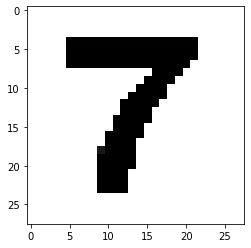

Prediction for test image is [3]


In [ ]:
img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X:dum, keep_prob:1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred))